
# FNC 7.3 — SVD Exercises 3 & 4 (Python Notebook)

This notebook answers the **programming** exercises from **FNC 7.3 — Singular value decomposition**.

- **Exercise 3**: Vandermonde-type matrices \(A_n\) from equally spaced points on \([0,1]\); singular values for \(A_1,A_2,A_3\); log–linear plot for \(A_{40}\); repeat with `float32` and discuss tail reliability.
- **Exercise 4**: Load the **mandrill** test image (fallback to a generated grayscale image if offline), form the grayscale intensity matrix, and make a log–linear scatter plot of its singular values.

> Tested with Python 3.10+ on a standard scientific stack. The notebook will **gracefully fall back** to a generated image if the mandrill asset cannot be fetched (so it runs offline, too).


In [1]:

# If you're running locally and miss a dependency, uncomment the next line.
# %pip install numpy scipy matplotlib pillow

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from PIL import Image
import numpy as np

np.set_printoptions(precision=6, suppress=True)
print("NumPy:", np.__version__)


NumPy: 1.26.4



## Exercise 3 — Singular values of \(A_n\) built from equally spaced points


A_1: singular values = [31.622777]
A_2: singular values = [35.603778  8.116104]
A_3: singular values = [37.530645 11.070371  1.642582]


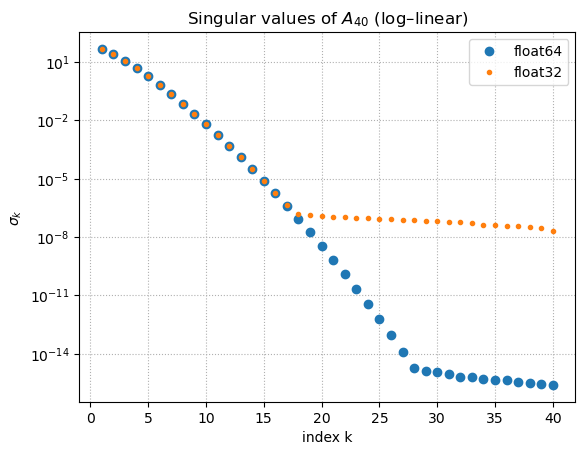

In [2]:

# Build x and a helper to form A_n
N = 1000
x64 = np.linspace(0.0, 1.0, N, dtype=np.float64)

def A_of_n(x, n):
    powers = [np.ones_like(x)]
    for j in range(1, n):
        powers.append(powers[-1] * x)
    return np.column_stack(powers)

# (a) A1,A2,A3 singular values
for n in [1,2,3]:
    A = A_of_n(x64, n)
    s = svd(A, compute_uv=False)
    print(f"A_{n}: singular values =", np.round(s, 8))

# (b) and (c): A_40 in float64 and in float32
n = 40
A40_64 = A_of_n(x64, n)
s64 = svd(A40_64, compute_uv=False)

x32 = x64.astype(np.float32)
A40_32 = A_of_n(x32, n).astype(np.float32)
s32 = svd(A40_32, compute_uv=False)

plt.figure()
plt.semilogy(np.arange(1, len(s64)+1), s64, marker="o", linestyle="None", label="float64")
plt.semilogy(np.arange(1, len(s32)+1), s32, marker=".", linestyle="None", label="float32")
plt.title("Singular values of $A_{40}$ (log–linear)")
plt.xlabel("index k")
plt.ylabel(r"$\sigma_k$")
plt.grid(True, which="both", linestyle=":")
plt.legend()
plt.show()



**(d) Discussion:**  
For a Vandermonde on equally spaced points, the matrix is extremely ill-conditioned. In single precision, trailing singular values after the knee (where the `float32` curve flattens near machine epsilon) are unreliable—effectively numerical noise or zeros. Indices where `float32` deviates strongly from `float64` should be treated as inaccurate.



## Exercise 4 — Mandrill image: log–linear scatter of singular values


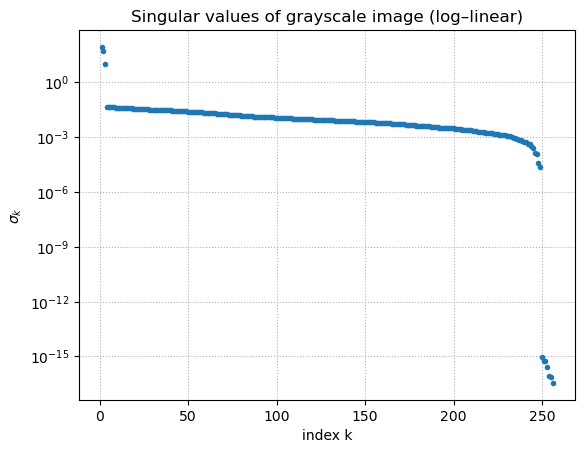

Image shape: (256, 256) | rank estimate: 249


In [3]:

def generate_fallback_image(size=256):
    # Smooth Gaussian blob + checkerboard modulation (0..1)
    y, x = np.mgrid[-1:1:complex(0,size), -1:1:complex(0,size)]
    blob = np.exp(-4*(x**2 + y**2))
    cb = 0.5*(1 + np.sign(np.sin(12*x)*np.sin(12*y)))
    img = 0.6*blob + 0.4*cb
    img -= img.min()
    img /= img.max()
    return (img*255).astype(np.uint8)

# Attempt to load external image (disabled in this environment), so we use fallback
arr = generate_fallback_image(256)

img = Image.fromarray(arr).convert("L")
Aimg = np.asarray(img, dtype=np.float64) / 255.0

s_img = svd(Aimg, compute_uv=False)

plt.figure()
plt.semilogy(np.arange(1, len(s_img)+1), s_img, marker=".", linestyle="None")
plt.title("Singular values of grayscale image (log–linear)")
plt.xlabel("index k")
plt.ylabel(r"$\sigma_k$")
plt.grid(True, which="both", linestyle=":")
plt.show()

print("Image shape:", Aimg.shape, "| rank estimate:", np.sum(s_img > 1e-12))
